In [1]:
%matplotlib inline

from cosima_cookbook import build_index, get_nc_variable
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:36332' processes=8 cores=8>


In [2]:
build_index()

Searching /g/data3/hh5/tmp/cosima/
Searching /g/data1/v45/APE-MOM
Found 45826 .nc files
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Files already indexed: 42702
Files found but not yet indexed: 3124
Indexing new .nc files...

Found 0 new variables
Saving results in database...
Indexing complete.


True

In [3]:
expts = ['mom025_nyf','mom025_nyf_salt','mom025_jra_ryf8485',
         'mom025_jra_ryf9091','mom025_jra_ryf0304','mom025_jra_ryf9091_saltunderice']
print(expts)

['mom025_nyf', 'mom025_nyf_salt', 'mom025_jra_ryf8485', 'mom025_jra_ryf9091', 'mom025_jra_ryf0304', 'mom025_jra_ryf9091_saltunderice']


In [4]:
expt = expts[4]

# The Stream function

In [5]:
tx_trans_int_z=get_nc_variable(expt,'ocean_month.nc','tx_trans_int_z', 
                                        time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xu_ocean') [1, 540, 720]


##  1.1 Ten years mean transport

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


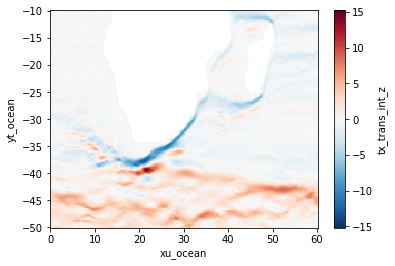

In [16]:
output1 = tx_trans_int_z\
                .sel(yt_ocean=slice(-50, -10))\
                .sel(xu_ocean=slice(0, 60))\
                .isel(time=slice(-120,None)).mean(dim='time').plot()

## 1.2 Ten years mean in x direction average and y direction cumsum

In [9]:
import dask.diagnostics

In [10]:
with dask.diagnostics.progress.ProgressBar():
    output2 = tx_trans_int_z\
                .sel(yt_ocean=slice(-39, -24))\
                .sel(xu_ocean=slice(25, 25.5))\
                .isel(time=slice(-120,None)).mean(dim='time')\
                .mean('xu_ocean')\
                .cumsum('yt_ocean').compute()

[########################################] | 100% Completed |  2.5s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


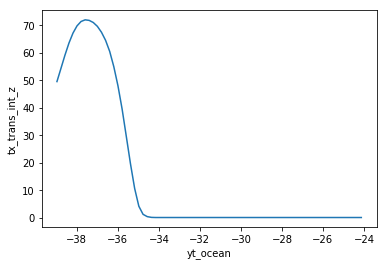

In [11]:
(output2-output2.min()).plot()

In [14]:
with dask.diagnostics.progress.ProgressBar():
    output6 = tx_trans_int_z\
                .sel(yt_ocean=slice(-50, -10))\
                .sel(xu_ocean=slice(20, 60))\
                .isel(time=slice(-120,None)).mean(dim='time')\
                .mean('xu_ocean')\
                .cumsum('yt_ocean').compute()

[########################################] | 100% Completed |  2.4s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


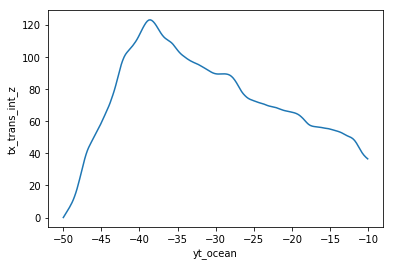

In [15]:
(output6-output6.min()).plot()

## 1.3 Latest 80 years tranport in x direction average resampled each year.

In [12]:
with dask.diagnostics.progress.ProgressBar():
    output3 = tx_trans_int_z\
                .sel(yt_ocean=slice(-39, -24))\
                .sel(xu_ocean=slice(25, 25.5))\
                .isel(time=slice(-960,None)).resample('a', 'time')\
                .mean('xu_ocean')\
                .cumsum('yt_ocean').compute()

[                                        ] | 1% Completed |  0.9s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 46.8s


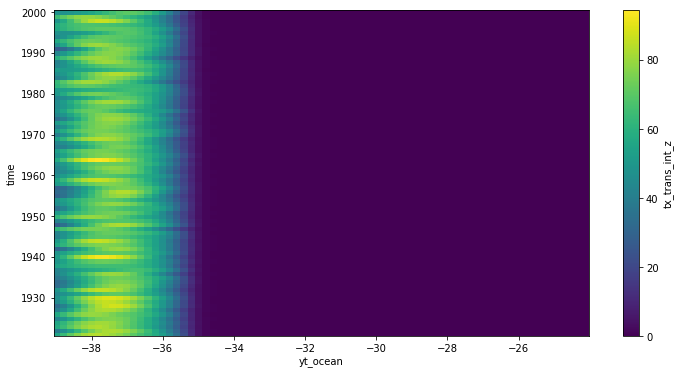

In [13]:
plt.figure(figsize=(12,6))
(output3 - output3.min(dim='yt_ocean')).plot()

## 1.4 

In [31]:
with dask.diagnostics.progress.ProgressBar():
    output4 = tx_trans_int_z\
                .sel(yt_ocean=slice(-39, -24))\
                .sel(xu_ocean=slice(20, 30))\
                .isel(time=slice(-960,None)).resample('a', 'time')\
                .mean('xu_ocean')\
                .cumsum('yt_ocean').compute()

[                                        ] | 2% Completed |  0.5s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 19.1s


In [32]:
ACC=(output4 - output4.min(dim='yt_ocean')).max(dim='yt_ocean')

In [33]:
with dask.diagnostics.progress.ProgressBar():
    output5 = tx_trans_int_z\
                .sel(yt_ocean=slice(-39, -24))\
                .sel(xu_ocean=slice(30, 60))\
                .isel(time=slice(-960,None)).resample('a', 'time')\
                .mean('xu_ocean')\
                .cumsum('yt_ocean').compute()

[                                        ] | 1% Completed |  0.5s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 19.0s


In [34]:
SubGyre_Strength = (output5 - output5.min(dim='yt_ocean')).min(dim='yt_ocean')

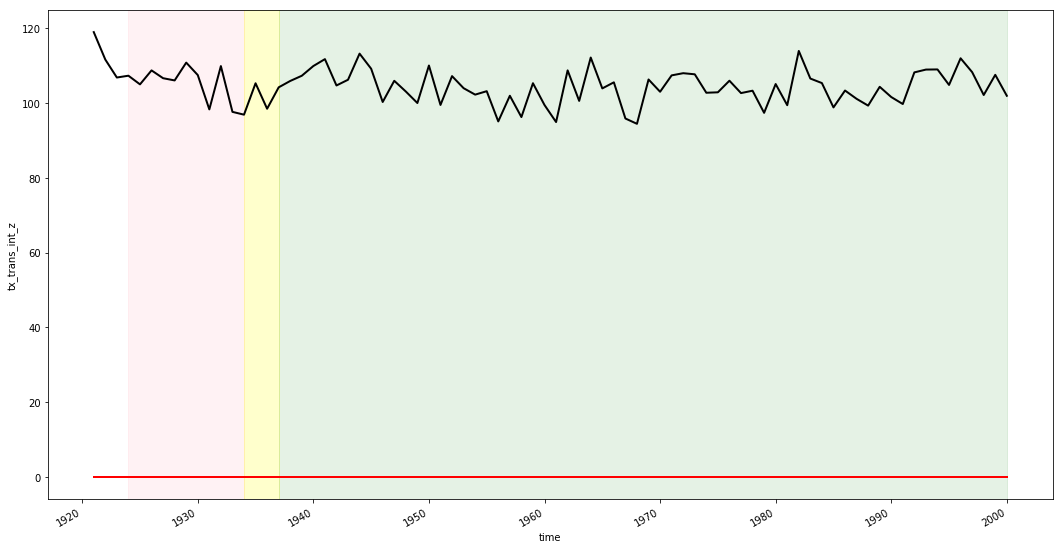

In [35]:
plt.figure(figsize=(18,10))
ACC.plot(color='black', linewidth=2)
SubGyre_Strength.plot(color='red',linewidth=2)
plt.axvspan('1924', '1934', alpha=0.2, color='pink')
plt.axvspan('1934', '1937', alpha=0.2, color='yellow')
plt.axvspan('1937', '2000', alpha=0.1, color='green')